In [1]:
import pandas as pd

data = pd.read_csv('iris.csv')

data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
group = data.groupby('Species').size()

print(group)

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


In [3]:
data = data.drop('Id', axis=1)

data.loc[data['Species'] == 'Iris-setosa', 'Species'] = 0
data.loc[data['Species'] == 'Iris-versicolor', 'Species'] = 1
data.loc[data['Species'] == 'Iris-virginica', 'Species'] = 2

data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
data = data.apply(pd.to_numeric)

data_array = data.values

x_data = data_array[:, :4]
y_data = data_array[:, 4]


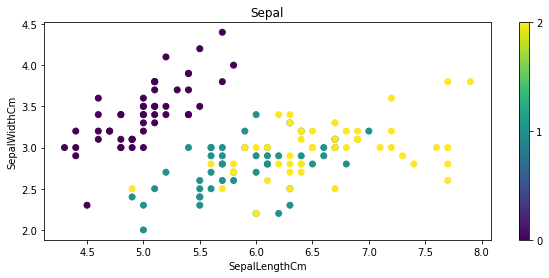

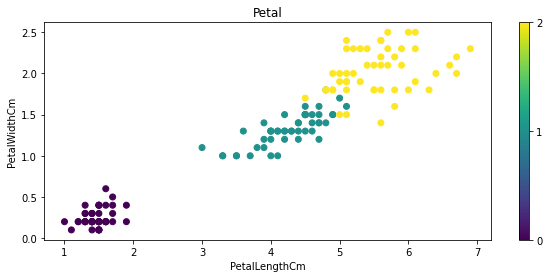

In [7]:
import matplotlib.pyplot as plt

n_samples, n_features = data.shape

def show_diagram(x, y, title):
    plt.figure(figsize=(10,4))
    plt.scatter(data.iloc[:,x], 

    data.iloc[:, y], c = data['Species'])

    plt.xlabel(data.columns[x])
    plt.ylabel(data.columns[y]) 
    plt.title(title)
    plt.colorbar(ticks=([0, 1, 2]))
    plt.show()

show_diagram(0,1,'Sepal')
show_diagram(2,3,'Petal')

In [8]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler

train_x, test_x, train_y, test_y = train_test_split(x_data, y_data, test_size=0.2)

ss = StandardScaler()

unscaled_features = train_x

train_x = ss.fit_transform(train_x)
test_x = ss.transform(test_x)
train_y = to_categorical(train_y)

In [15]:
import tensorflow as tf
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense

input_layer = Input(shape=(4,), name='input')
hidden_layer1 = Dense(units=30, activation="relu", name="hidden_layer1")(input_layer)
output_layer = Dense(units=3, activation="tanh", name="output_layer")(hidden_layer1)
model = Model(input_layer, output_layer)
epochs = 1000
loss_object = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)

loss = 0
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        predictions = model(train_x)
        loss = loss_object(train_y, predictions)

        if epoch % 50 == 0:
            print("%d / 50 -- loss = %.4f" % (epoch, loss.numpy()))

    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
print("loss = %.4f" % (loss.numpy()))

0 / 50 -- loss = 0.7805
50 / 50 -- loss = 0.0790
100 / 50 -- loss = 0.0612
150 / 50 -- loss = 0.0509
200 / 50 -- loss = 0.0437
250 / 50 -- loss = 0.0384
300 / 50 -- loss = 0.0346
350 / 50 -- loss = 0.0314
400 / 50 -- loss = 0.0290
450 / 50 -- loss = 0.0272
500 / 50 -- loss = 0.0259
550 / 50 -- loss = 0.0248
600 / 50 -- loss = 0.0240
650 / 50 -- loss = 0.0233
700 / 50 -- loss = 0.0227
750 / 50 -- loss = 0.0222
800 / 50 -- loss = 0.0217
850 / 50 -- loss = 0.0213
900 / 50 -- loss = 0.0210
950 / 50 -- loss = 0.0206
loss = 0.0204


In [16]:
import numpy as np

classes = np.argmax(model(test_x).numpy(), axis=1)

y_pred = model(test_x).numpy()
y_pred_bool = np.argmax(y_pred, axis=1)

accuration = np.sum(classes == test_y)/len(test_y) * 100

print("Test Accuration : " + str(accuration) + '%')
print("Prediction :")
print(classes)
print("Target :")
print(np.asarray(test_y, dtype="int32"))

Test Accuration : 90.0%
Prediction :
[2 2 2 1 2 0 1 0 1 2 1 2 2 2 0 2 1 2 1 2 1 2 1 2 2 1 1 1 2 1]
Target :
[2 2 2 1 1 0 1 0 1 2 1 2 2 1 0 2 1 2 1 2 2 2 1 2 2 1 1 1 2 1]


In [17]:
from sklearn.metrics import classification_report

print(classification_report(test_y, y_pred_bool))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         3
         1.0       0.92      0.85      0.88        13
         2.0       0.87      0.93      0.90        14

    accuracy                           0.90        30
   macro avg       0.93      0.92      0.93        30
weighted avg       0.90      0.90      0.90        30

